# Zomato Data Analysis Project

### Step - 1 Importing Libraries


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Step - 2 Create a Data frame

In [11]:
df = pd.read_csv("./Zomato data .csv")

#### Get Basic Information about the dataframe

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [13]:
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


#### Data Cleaning and Data processing

As we can see from the above, in rate column is of object type so that we have to change that particular type to float type.

Remove '/5' from the 'rate' column and convert to numeric (Float)

In [14]:
df['rate'] = df['rate'].str.replace('/5', '').astype(float)

Here, we gonna check whether there are any null values present in the dataframe

In [19]:
df.isnull().value_counts()

name   online_order  book_table  rate   votes  approx_cost(for two people)  listed_in(type)
False  False         False       False  False  False                        False              148
Name: count, dtype: int64

Calculate Average Cost per Vote


Create a new column 'cost_per_vote' which is the cost divided by the votes

In [39]:
df['cost_per_vote'] = df['approx_cost(for two people)'] / df['votes']

Group by listed_in(type)

Calculate the average rating, votes, and cost for each restaurant type

In [40]:
grouped_df = df.groupby('listed_in(type)').agg({
    'rate': 'mean',
    'votes': 'mean',
    'approx_cost(for two people)': 'mean'
}).reset_index()

Rename the columns for better understanding

In [42]:
grouped_df.columns = ['Restaurant Type', 'Average Rating', 'Average Votes', 'Average Cost']
grouped_df

,Restaurant Type,Average Rating,Average Votes,Average Cost
0,Buffet,3.842857,432.571429,671.428571
1,Cafes,3.765217,279.739130,545.652174
2,Dining,3.571818,185.118182,357.272727
3,other,3.912500,1170.875000,668.750000


Q.1 Which type of restaurant do the majority of customers order from ?

In [43]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type),cost_per_vote
0,Jalsa,Yes,Yes,4.1,775,800,Buffet,1.032258
1,Spice Elephant,Yes,No,4.1,787,800,Buffet,1.016518
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet,0.871460
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet,3.409091
4,Grand Village,No,No,3.8,166,600,Buffet,3.614458


Set the aesthetic style of the plots

In [51]:
sns.set_style("whitegrid")

Create a customized countplot

C:\Users\praja\AppData\Local\Temp\ipykernel_13000\964950991.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


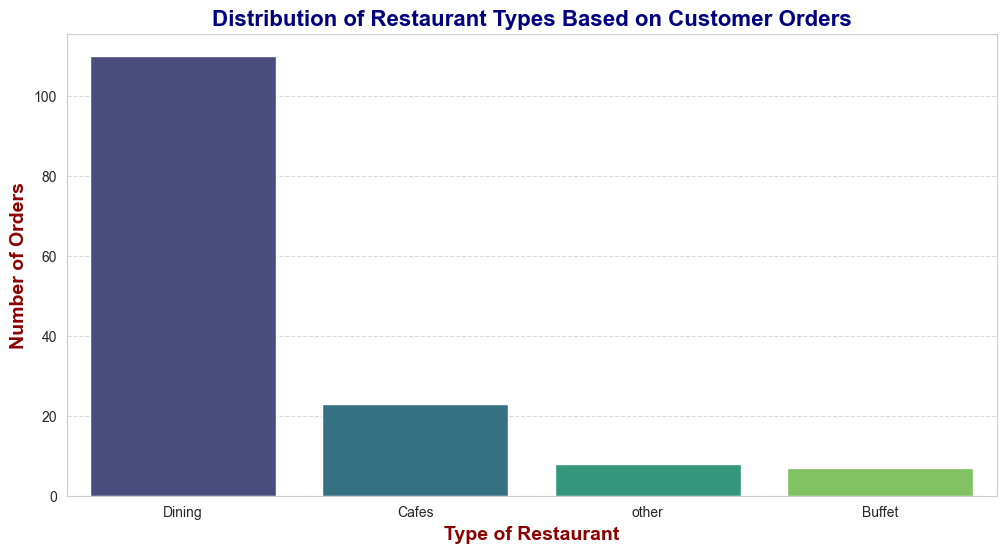

In [60]:
# Increase the figure size for better visibility
plt.figure(figsize=(12, 6))

sns.countplot(
    x=df['listed_in(type)'],
    palette="viridis",  # Use a vibrant color palette
    order=df['listed_in(type)'].value_counts().index  # Sort by the most frequent type
)

# Add titles and Lables
plt.title('Distribution of Restaurant Types Based on Customer Orders', fontsize=16, fontweight='bold', color='navy')
plt.xlabel('Type of Restaurant', fontsize=14, fontweight='bold', color='darkred')
plt.ylabel('Number of Orders', fontsize=14, fontweight='bold', color='darkred')

# Show gridlines only on y-axis
plt.grid(axis='y', linestyle='--', alpha=0.7)

Conclusion - Majority of the resturant falls in dinning category

Q.2 Top Rated Restaurants

Filter restaurants with a rating of 4.0 and above

In [45]:
top_rated_restaurants = df[df['rate'] >= 4.0]
top_rated_restaurants

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type),cost_per_vote
0,Jalsa,Yes,Yes,4.1,775,800,Buffet,1.032258
1,Spice Elephant,Yes,No,4.1,787,800,Buffet,1.016518
7,Onesta,Yes,Yes,4.6,2556,600,Cafes,0.234742
8,Penthouse Cafe,Yes,No,4.0,324,700,other,2.160494
9,Smacznego,Yes,No,4.2,504,550,Cafes,1.091270
10,Village Café,Yes,No,4.1,402,500,Cafes,1.243781
11,Cafe Shuffle,Yes,Yes,4.2,150,600,Cafes,4.000000
12,The Coffee Shack,Yes,Yes,4.2,164,500,Cafes,3.048780
13,Caf-Eleven,No,No,4.0,424,450,Cafes,1.061321
30,Redberrys,Yes,No,4.0,219,600,Cafes,2.739726


Q.3 High - Cost Restaurants

Calculate the average cost for two people

In [46]:
average_cost = df['approx_cost(for two people)'].mean()

Filter restaurants with an approx_cost above the average

In [48]:
high_cost_restaurants = df[df['approx_cost(for two people)'] > average_cost]
high_cost_restaurants

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type),cost_per_vote
0,Jalsa,Yes,Yes,4.1,775,800,Buffet,1.032258
1,Spice Elephant,Yes,No,4.1,787,800,Buffet,1.016518
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet,0.871460
4,Grand Village,No,No,3.8,166,600,Buffet,3.614458
5,Timepass Dinner,Yes,No,3.8,286,600,Buffet,2.097902
...,...,...,...,...,...,...,...,...
97,Ayda Persian Kitchen,No,No,3.7,39,950,Dining,24.358974
104,CAFE NOVA,No,No,3.2,11,600,Dining,54.545455
119,K27 - The Pub,No,No,3.1,30,900,Dining,30.000000
145,Anna Kuteera,Yes,No,4.0,771,450,Dining,0.583658


Q.4 Table Booking Availability for High-Rated Restaurants

Filter restaurants with a rating above 4.0 that also offer table booking

In [50]:
high_rated_table_booking_restaurants = df[(df['rate'] > 4.0) & (df['book_table'] == 'Yes')]
high_rated_table_booking_restaurants

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type),cost_per_vote
0,Jalsa,Yes,Yes,4.1,775,800,Buffet,1.032258
7,Onesta,Yes,Yes,4.6,2556,600,Cafes,0.234742
11,Cafe Shuffle,Yes,Yes,4.2,150,600,Cafes,4.000000
12,The Coffee Shack,Yes,Yes,4.2,164,500,Cafes,3.048780
44,Onesta,Yes,Yes,4.6,2556,600,other,0.234742
57,Wamama,Yes,Yes,4.2,354,800,other,2.259887


Q.5 How many votes does each type of restaurant received from customers?

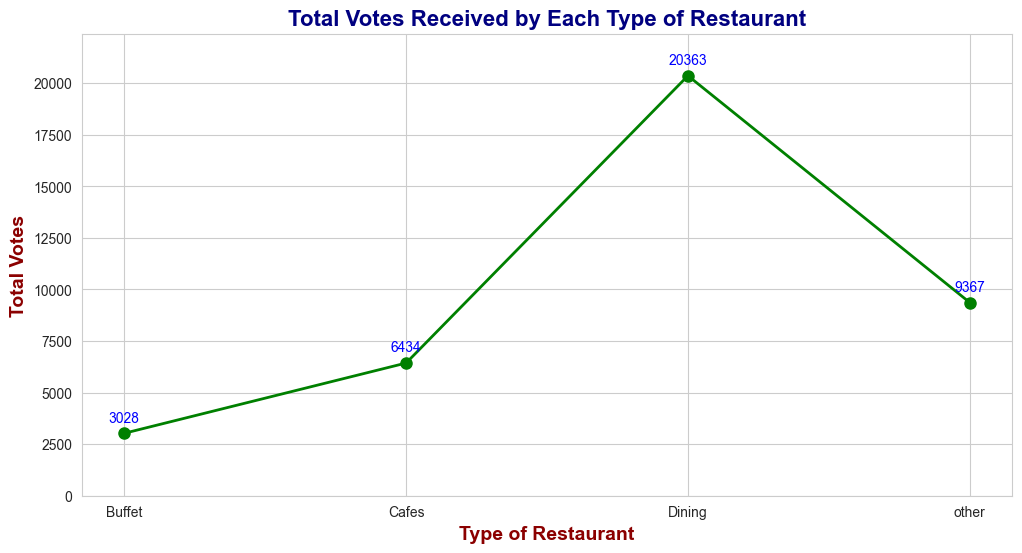

In [62]:
grouped_data = df.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})

# Increase figure size for better visibility
plt.figure(figsize=(12, 6))

# Plot the data with a line plot
plt.plot(result.index, result['votes'], color='green', marker='o', linestyle='-', linewidth=2, markersize=8)

# Enhance the title and labels
plt.title('Total Votes Received by Each Type of Restaurant', fontsize=16, fontweight='bold', color='navy')
plt.xlabel('Type of Restaurant', fontsize=14, fontweight='bold', color='darkred')
plt.ylabel('Total Votes', fontsize=14, fontweight='bold', color='darkred')

# Set limits for the y-axis to ensure the plot is balanced
plt.ylim(0, max(result['votes']) * 1.1)

# Add a data label for each point on the plot
for i, v in enumerate(result['votes']):
    plt.text(i, v + max(result['votes']) * 0.02, str(v), ha='center', va='bottom', fontsize=10, color='blue')


Conclusion - Dinning resturants have received maximum votes


Q.6 What are the ratings that majority of the restaurants has received?

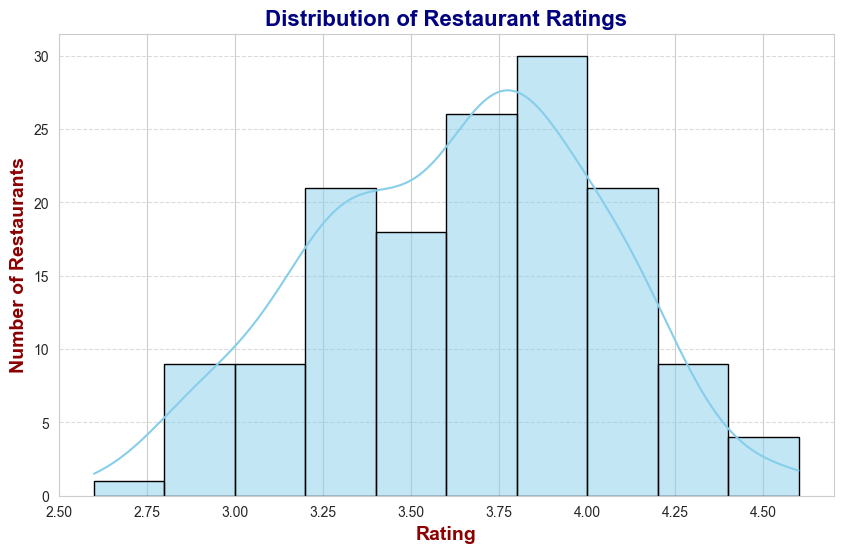

In [65]:
# Set the figure size for better visibility
plt.figure(figsize=(10, 6))

# Use seaborn to create a histogram with better aesthetics
sns.histplot(df['rate'], bins=10, kde=True, color='skyblue', edgecolor='black')

# Enhance the title and labels
plt.title("Distribution of Restaurant Ratings", fontsize=16, fontweight='bold', color='navy')
plt.xlabel("Rating", fontsize=14, fontweight='bold', color='darkred')
plt.ylabel("Number of Restaurants", fontsize=14, fontweight='bold', color='darkred')

# Add gridlines to make the plot easier to interpret
plt.grid(axis='y', linestyle='--', alpha=0.7)



Conclusion - The Majority resturants received ratinsg from 3.5 to 4

Q.7 What would be the average spending of couples for online ordering food ?

Set the style and color palette

In [66]:
sns.set_style("whitegrid")
sns.set_palette("viridis")

Create the countplot

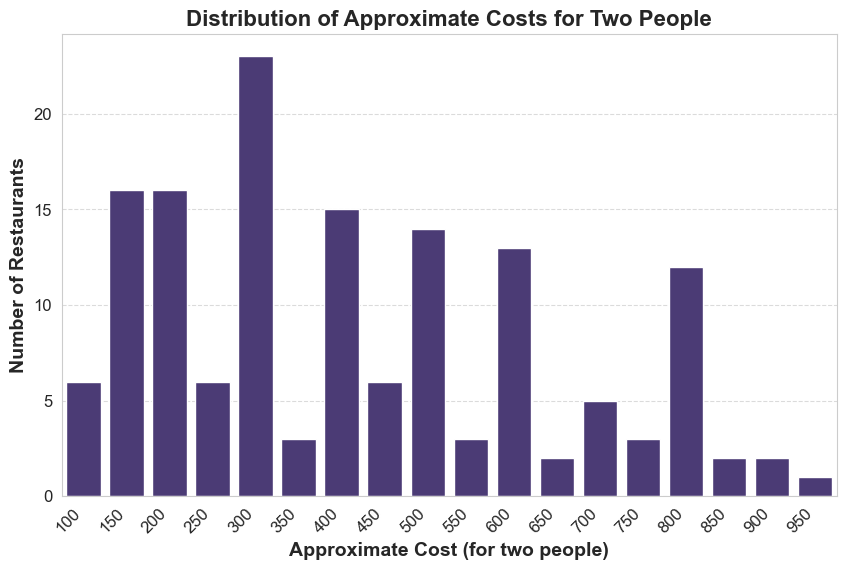

In [67]:
plt.figure(figsize=(10, 6))
sns.countplot(x='approx_cost(for two people)', data=df, order=sorted(df['approx_cost(for two people)'].unique()))

# Customize the plot
plt.title("Distribution of Approximate Costs for Two People", fontsize=16, weight='bold')
plt.xlabel("Approximate Cost (for two people)", fontsize=14, weight='bold')
plt.ylabel("Number of Restaurants", fontsize=14, weight='bold')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

Conclusion - The Majority of couples preferred resturants with an approximate cost of 300 reupees

Q.8 Which Mode(Online/Offline) receives maximum rating ?

C:\Users\praja\AppData\Local\Temp\ipykernel_13000\3584103223.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='online_order', y='rate', data=df, palette='Set2')


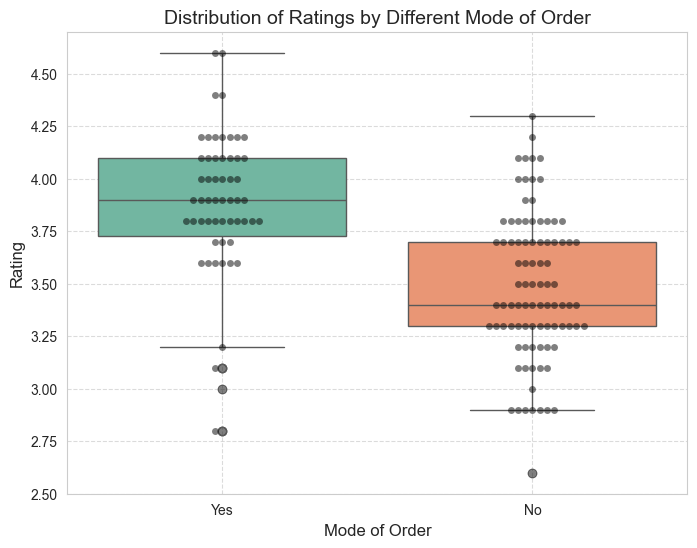

In [70]:
plt.figure(figsize=(8, 6))

# Boxplot
sns.boxplot(x='online_order', y='rate', data=df, palette='Set2')

# Overlay swarmplot
sns.swarmplot(x='online_order', y='rate', data=df, color='k', alpha=0.5)

# Add titles and labels
plt.title('Distribution of Ratings by Different Mode of Order', fontsize=14)
plt.xlabel('Mode of Order', fontsize=12)
plt.ylabel('Rating', fontsize=12)

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.7)

Conclusion - offline order received lower rating in comparison to online order.

Q.9 Which Type of Restaurant has received more offline orders ?

In [37]:
pivot_table = df.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
pivot_table

online_order,No,Yes
listed_in(type),,
Buffet,3,4
Cafes,8,15
Dining,77,33
other,2,6


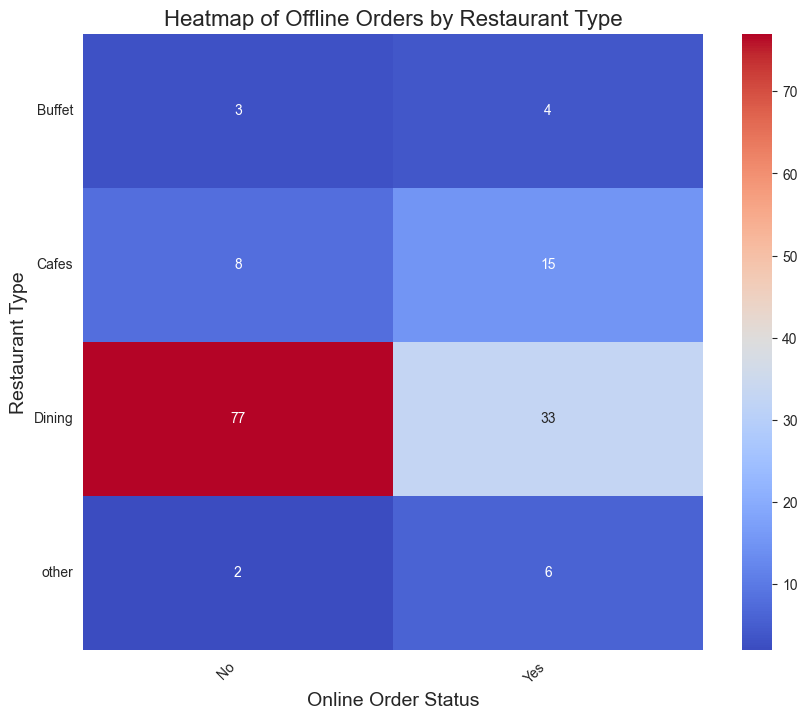

In [72]:
plt.figure(figsize=(10, 8))

# Heatmap
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt='d', annot_kws={"size": 10})

# Add titles and labels
plt.title('Heatmap of Offline Orders by Restaurant Type', fontsize=16)
plt.xlabel('Online Order Status', fontsize=14)
plt.ylabel('Restaurant Type', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust y-axis labels if needed
plt.yticks(rotation=0)

# Show the plot
plt.show()

Conclusion - Dining resturants primarily accept offline orders, whereas cafes primarily received online orders. This suggests that clients prefered orders in person at resturants, but prefer online ordering at cafes.